In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [2]:
#=================================================-
#### Slide 4: Loading packages  ####

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# We will introduce it when we use it
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics




In [3]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




C:\Users\Max\Downloads\Classification-with-Python-main
C:\Users\Max\Downloads\Classification-with-Python-main/data


In [4]:
#=================================================-
#### Slide 6: Load data into Python  ####

df = pd.read_csv(str(data_dir)+"/"+ 'healthcare-dataset-stroke-data.csv')
print(df.head())




      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [5]:
#=================================================-
#### Slide 7: Subset data  ####

df = df[['age', 'avg_glucose_level', 'heart_disease', 'ever_married', 'hypertension', 'Residence_type', 'gender', 'smoking_status', 'work_type', 'stroke', 'id']]
print(df.head())




    age  avg_glucose_level  heart_disease ever_married  hypertension  \
0  67.0             228.69              1          Yes             0   
1  61.0             202.21              0          Yes             0   
2  80.0             105.92              1          Yes             0   
3  49.0             171.23              0          Yes             0   
4  79.0             174.12              0          Yes             1   

  Residence_type  gender   smoking_status      work_type  stroke     id  
0          Urban    Male  formerly smoked        Private       1   9046  
1          Rural  Female     never smoked  Self-employed       1  51676  
2          Rural    Male     never smoked        Private       1  31112  
3          Urban  Female           smokes        Private       1  60182  
4          Rural  Female     never smoked  Self-employed       1   1665  


In [6]:
#=================================================-
#### Slide 8: Convert target to binary  ####

# Target not binary - calculate the mean and assign the above mean to 1 and below to 0
threshold = np.mean(df['stroke'])
df['stroke'] = np.where(df['stroke'] > threshold, 1,0)
# Target is binary
print(df['stroke'])




0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [7]:
#=================================================-
#### Slide 11: The data at first glance  ####

# The first 3 rows.
print(df.head(3))
# The data types.
print(df.dtypes)
print(df['stroke'].value_counts())




    age  avg_glucose_level  heart_disease ever_married  hypertension  \
0  67.0             228.69              1          Yes             0   
1  61.0             202.21              0          Yes             0   
2  80.0             105.92              1          Yes             0   

  Residence_type  gender   smoking_status      work_type  stroke     id  
0          Urban    Male  formerly smoked        Private       1   9046  
1          Rural  Female     never smoked  Self-employed       1  51676  
2          Rural    Male     never smoked        Private       1  31112  
age                  float64
avg_glucose_level    float64
heart_disease          int64
ever_married          object
hypertension           int64
Residence_type        object
gender                object
smoking_status        object
work_type             object
stroke                 int64
id                     int64
dtype: object
stroke
0    4861
1     249
Name: count, dtype: int64


In [8]:
#=================================================-
#### Slide 12: Data prep: check for NAs  ####

 # Check for NAs.
print(df.isnull().sum())




age                     0
avg_glucose_level       0
heart_disease           0
ever_married            0
hypertension            0
Residence_type          0
gender                  0
smoking_status       1544
work_type               0
stroke                  0
id                      0
dtype: int64


In [9]:
#=================================================-
#### Slide 13: Data prep: check for NAs  ####

percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)




age                   0.000000
avg_glucose_level     0.000000
heart_disease         0.000000
ever_married          0.000000
hypertension          0.000000
Residence_type        0.000000
gender                0.000000
smoking_status       30.215264
work_type             0.000000
stroke                0.000000
id                    0.000000
dtype: float64


In [10]:
#=================================================-
#### Slide 14: Data prep: check for NAs  ####

# Delete columns containing either 50% or more than 50% NaN Values
perc = 50.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna(axis=1,
               thresh=min_count)
print(df.shape)
# Function to impute NA in both numeric and categorical columns
def fillna(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_numeric = df.select_dtypes(include=numerics)
    df_non_numeric = df.select_dtypes(exclude=numerics)

    df_numeric = df_numeric.fillna(df_numeric.mean())

    for column in df_non_numeric.columns:
        df_non_numeric[column].fillna(df_non_numeric[column].mode()[0], inplace=True)

    df = pd.concat([df_numeric, df_non_numeric], axis=1)
    return df
df = fillna(df)




(5110, 11)


C:\Users\Max\AppData\Local\Temp\ipykernel_10904\1447857108.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_non_numeric[column].fillna(df_non_numeric[column].mode()[0], inplace=True)


In [11]:
#=================================================-
#### Slide 15: Data prep: ready for kNN  ####

print(df['stroke'].dtypes)
# Identify the the two unique classes
unique_values = sorted(df['stroke'].unique())
df['stroke'] = np.where(df['stroke'] == unique_values[0], False,True)
# Split the data into X and y
columns_to_drop_from_X = ['stroke'] + ['id']
X = df.drop(columns_to_drop_from_X, axis = 1)
y = np.array(df['stroke'])




int64


In [12]:
#=================================================-
#### Slide 16: Data prep: numeric variables  ####

print(X.dtypes)
X = pd.get_dummies(X, columns = ['heart_disease', 'ever_married', 'hypertension', 'Residence_type', 'gender', 'smoking_status', 'work_type'], dtype=float, drop_first=True)
print(X.dtypes)




age                  float64
avg_glucose_level    float64
heart_disease          int64
hypertension           int64
ever_married          object
Residence_type        object
gender                object
smoking_status        object
work_type             object
dtype: object
age                            float64
avg_glucose_level              float64
heart_disease_1                float64
ever_married_Yes               float64
hypertension_1                 float64
Residence_type_Urban           float64
gender_Male                    float64
gender_Other                   float64
smoking_status_never smoked    float64
smoking_status_smokes          float64
work_type_Never_worked         float64
work_type_Private              float64
work_type_Self-employed        float64
work_type_children             float64
dtype: object


In [13]:
#=================================================-
#### Slide 22: Train and test: small scale before n-fold  ####

# Set the seed.
np.random.seed(1)

# Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3)





In [14]:
#=================================================-
#### Slide 24: Data prep: scaling variables  ####

# Scale X.
X_train = scale(X_train)
X_test = scale(X_test)
print(X_train[0:2])
print(X_test[0:2])


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


[[ 0.60884288  0.63825752 -0.23816135  0.71900176 -0.33037446  0.99414629
   1.17402064  0.          0.69941096 -0.42534432 -0.06910341  0.86404979
  -0.43810503 -0.3922639 ]
 [-1.88698872 -0.38666334 -0.23816135 -1.39081718 -0.33037446 -1.00588818
  -0.85177378  0.          0.69941096 -0.42534432 -0.06910341 -1.15734072
  -0.43810503  2.54930418]]
[[-0.04508466  0.12994683 -0.24077171  0.73532545 -0.32444284 -1.04061541
  -0.81405762 -0.02554881 -1.43949446 -0.43189409 -0.0572036  -1.1562397
  -0.43401854 -0.39840954]
 [ 1.52709552 -0.64601991 -0.24077171  0.73532545 -0.32444284  0.96096982
  -0.81405762 -0.02554881 -1.43949446 -0.43189409 -0.0572036   0.86487257
  -0.43401854 -0.39840954]]


In [15]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [16]:
#=================================================-
#### Slide 5: kNN: build model  ####

# Create kNN classifier.
default = 5
kNN = KNeighborsClassifier(n_neighbors = default)
# Fit the classifier to the data.
kNN.fit(X_train, y_train)




KNeighborsClassifier()

In [17]:
#=================================================-
#### Slide 6: kNN: predict on a test set  ####

predictions = kNN.predict(X_test)
print(predictions[0:5])




[False False False False False]


In [18]:
#=================================================-
#### Slide 7: kNN: predict on test  ####

actual_v_predicted = np.column_stack((y_test, predictions))
print(actual_v_predicted[0:5])




[[False False]
 [False False]
 [False False]
 [False False]
 [False False]]


In [19]:
#=================================================-
#### Slide 20: Confusion matrix in python  ####

# Confusion matrix for kNN.
cm_kNN = confusion_matrix(y_test, predictions)
print(cm_kNN)
print(round(accuracy_score(y_test, predictions),
4))




[[1443    7]
 [  82    1]]
0.9419


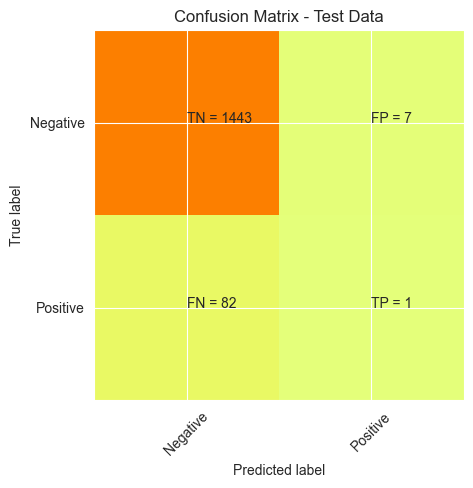

In [20]:
#=================================================-
#### Slide 21: Confusion matrix: visualize  ####

plt.imshow(cm_kNN, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_kNN[i][j]))
plt.show()




In [21]:
#=================================================-
#### Slide 22: Evaluation of kNN with k neighbors  ####

# Create a dictionary with accuracy values for our kNN model with k.
model_final_dict = {'metrics': ["accuracy"],
                    'values':[round(accuracy_score(y_test, predictions), 4)],
                    'model':['kNN_k']}
model_final = pd.DataFrame(data = model_final_dict)
print(model_final)




    metrics  values  model
0  accuracy  0.9419  kNN_k


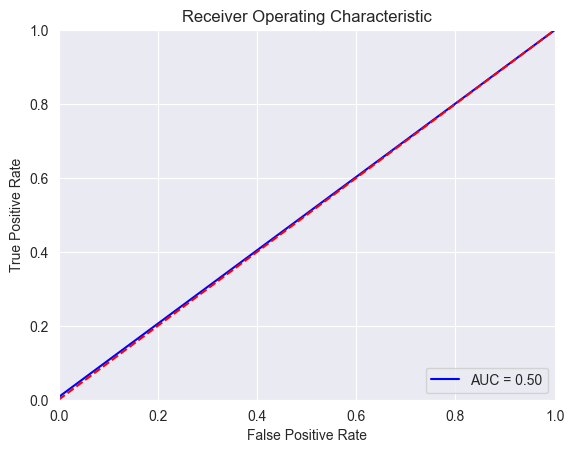

In [22]:
#=================================================-
#### Slide 26: Plot ROC and calculate AUC  ####

# Store FPR, TPR, and threshold as variables.
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
# Store the AUC.
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [23]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 4 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [24]:
#=================================================-
#### Slide 6: Cross-validation pipeline for optimal accuracy  ####

# Create a pipeline of the scaler and Estimator
cv_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', kNN)])




In [25]:
#=================================================-
#### Slide 7: Cross-validation for optimal accuracy  ####

# Calculate cv scores
cv_scores = cross_val_score(cv_pipeline, X, y, cv = 5)




In [26]:
#=================================================-
#### Slide 8: Cross-validation for optimal accuracy  ####

# Print each cv score (accuracy) and average them.
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


[0.94911937 0.94618395 0.9481409  0.95009785 0.9481409 ]
cv_scores mean:0.9483365949119374
Optimal cv score is: 0.9483


In [27]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 5 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [28]:
#=================================================-
#### Slide 5: Finding optimal k - GridSearchCV  ####

# Define the parameter values that should be searched.
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched by building a Python dictionary.
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors = k_range)
print(param_grid)

# Instantiate the grid using our original model - kNN with k.
grid = GridSearchCV(kNN, param_grid, cv = 10, scoring = 'accuracy')





{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [29]:
#=================================================-
#### Slide 6: Finding optimal k - GridSearchCV  ####

# Create a pipeline of the scaler and gridsearch
grid_search_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', grid)])

# Fit Gridsearch pipeline
grid_search_pipeline.fit(X, y)




Pipeline(steps=[('transformer', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30]},
                              scoring='accuracy'))])

In [30]:
#=================================================-
#### Slide 7: Finding optimal k - view results  ####

# View the complete results (list of named tuples).
print(grid.cv_results_['mean_test_score'])




[0.91643836 0.94637965 0.94168297 0.94990215 0.9481409  0.95009785
 0.94951076 0.95088063 0.95029354 0.95107632 0.95068493 0.95088063
 0.95068493 0.95107632 0.95107632 0.95107632 0.95107632 0.95127202
 0.95127202 0.95127202 0.95127202 0.95127202 0.95127202 0.95127202
 0.95127202 0.95127202 0.95127202 0.95127202 0.95127202 0.95127202]


In [31]:
#=================================================-
#### Slide 8: Finding optimal k  ####

# Create a list of the mean scores only by using a list comprehension to loop through grid.cv_results_.
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)




[np.float64(0.9164383561643836), np.float64(0.9463796477495107), np.float64(0.941682974559687), np.float64(0.9499021526418787), np.float64(0.9481409001956946), np.float64(0.9500978473581212), np.float64(0.9495107632093933), np.float64(0.950880626223092), np.float64(0.9502935420743638), np.float64(0.9510763209393346), np.float64(0.9506849315068493), np.float64(0.950880626223092), np.float64(0.9506849315068493), np.float64(0.9510763209393346), np.float64(0.9510763209393346), np.float64(0.9510763209393346), np.float64(0.9510763209393346), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773), np.float64(0.9512720156555773)]


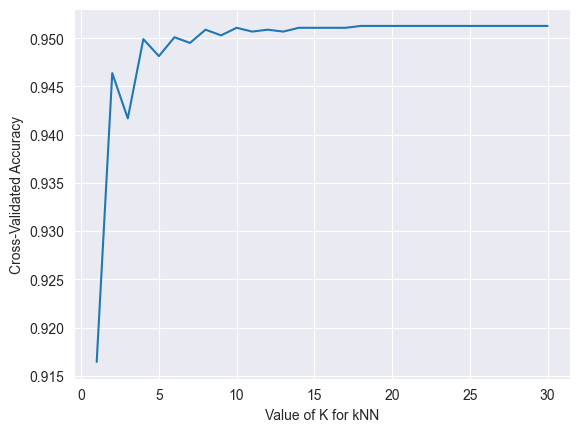

In [32]:
#=================================================-
#### Slide 9: Finding optimal k - plot  ####

# Plot the results.
_ = plt.plot(k_range, grid_mean_scores)
_ = plt.xlabel('Value of K for kNN')
_ = plt.ylabel('Cross-Validated Accuracy')
plt.show()




In [33]:
#=================================================-
#### Slide 10: Define and examine the optimized model   ####

# Single best score achieved across all params (k).
print(grid.best_score_)
grid_score = grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(grid.best_params_)

# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print(grid.best_estimator_)





0.9512720156555773
{'n_neighbors': 18}
KNeighborsClassifier(n_neighbors=18)


In [34]:
#=================================================-
#### Slide 11: Add GridSearchCV score to the final scores  ####

new_row = pd.DataFrame({'metrics' : ["accuracy"],
                        'values' : [round(grid_score, 4)],
                        'model': ['kNN_GridSearchCV']})
model_final = pd.concat([model_final, new_row], ignore_index=True)

print(model_final)




    metrics  values             model
0  accuracy  0.9419             kNN_k
1  accuracy  0.9513  kNN_GridSearchCV


In [35]:
#=================================================-
#### Slide 12: Optimal model and final thoughts  ####

kNN_best = grid.best_estimator_

# Check accuracy of our model on the test data.
print(kNN_best.score(X_test, y_test))
kNN_champ = kNN_best.score(X_test, y_test)




0.9458577951728636


In [36]:
#=================================================-
#### Slide 14: Final Model   ####

# Save this final model
# model_final = {'metrics' : "accuracy" ,
#                                   'values' : round(kNN_champ, 4),
#                                   'model':'kNN_optimized' }
# print(model_final)
# pickle.dump(model_final, open(str(data_dir)+"/"+"model_final.sav", 'wb'))

model_final = {'metrics' : "accuracy" ,
                                  'values' : round(kNN_best.score(X_test, y_test), 4),
                                  'model': kNN_best }
print(model_final)
pickle.dump(model_final, open(str(data_dir)+"\\"+"model_final.sav", 'wb'))



{'metrics': 'accuracy', 'values': 0.9459, 'model': KNeighborsClassifier(n_neighbors=18)}


In [37]:
mod = pickle.load(open(str(data_dir) + '\\model_final.sav', 'rb'))

print(round(mod['model'].score(X_test, y_test), 4))

0.9459


In [38]:
#=================================================-
#### Slide 18: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
